# Plot

In [46]:

import os
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import pickle
import numpy as np


mpl.rcParams.update({
    "pdf.fonttype": 42,            # editable text in Adobe Illustrator
    "ps.fonttype": 42,             # editable text in Adobe Illustrator
    
    "figure.dpi": 200,
    "savefig.dpi": 600,              # very high-res when saving
    "savefig.format": "pdf",         # vector output preferred

    # # Fonts
    # "font.family": "serif",
    # "font.serif": ["Times New Roman"],  # IEEE default

    # # Axes
    "axes.linewidth": 1.5,
    
    # Lines
    "lines.linewidth": 2.0,
})


# # # G1
# DATA_ROOT = Path(os.path.realpath('__file__')).parent.parent.parent.parent / "logs" / "rsl_rl/g1_flat_deploy"
# data_dir = DATA_ROOT / "2025-11-18_19-13-39_g1_flat_deploy" / "logs" 

# T1
# DATA_ROOT = Path(os.path.realpath('__file__')).parent.parent.parent.parent / "logs" / "rsl_rl/t1_flat_zh"
# data_dir = DATA_ROOT / "2025-11-13_16-57-12_t1_flat_zh" / "logs" 
# DATA_ROOT = Path(os.path.realpath('__file__')).parent.parent.parent.parent / "logs" / "rsl_rl/t1_flat_soft"
# data_dir = DATA_ROOT / "2025-11-14_00-06-24_t1_flat_soft" / "logs" 

# DATA_ROOT = Path(os.path.realpath('__file__')).parent.parent.parent.parent / "logs" / "rsl_rl/t1_flat_soft"
# data_dir = DATA_ROOT / "2025-11-15_22-56-23_t1_flat_soft" / "logs" 

DATA_ROOT = Path(os.path.realpath('__file__')).parent.parent.parent.parent / "logs" / "rsl_rl/t1_23dof_flat_soft"
data_dir = DATA_ROOT / "2025-12-02_12-49-56_t1_23dof_flat_soft" / "logs" 

In [47]:
# # G1
# base_lin_vel_idx = slice(0, 3)   # x, y, z
# base_ang_vel_idx = slice(3, 6)   # roll, pitch, yaw
# projected_gravity_idx = slice(6, 9)  # x, y, z
# velocity_commands_idx = slice(9, 12)  # x, y, yaw
# joint_pos_idx = slice(12, 49)  # 37 joints
# joint_vel_idx = slice(49, 86)  # 37 joints
# joint_torque_idx = slice(86, 123)  # 37 joints


base_lin_vel_idx = slice(0, 3)   # x, y, z
base_ang_vel_idx = slice(3, 6)   # roll, pitch, yaw
velocity_commands_idx = slice(6, 9)  # x, y, yaw

In [71]:
muint = 0.3
data_path = data_dir / f"3d_rft_muint_{muint}"
# data_path = data_dir / "rl_play"

policy_obs_path = (data_path / "obs/obs.pkl").as_posix()
contact_obs_path = (data_path / "contact/contact.pkl").as_posix()

with open(policy_obs_path, "rb") as f:
    policy_obs = pickle.load(f)
    policy_obs = np.array(policy_obs).squeeze(0)

with open(contact_obs_path, "rb") as f:
    contact_obs = pickle.load(f)
    contact_obs = np.array(contact_obs).squeeze(0)
print(f"policy_obs shape: {policy_obs.shape}")
print(f"contact_obs shape: {contact_obs.shape}")

soft_contact_data = {}
soft_contact_data["base_lin_vel"] = policy_obs[:, :, base_lin_vel_idx]
soft_contact_data["base_ang_vel"] = policy_obs[:, :, base_ang_vel_idx]
# soft_contact_data["projected_gravity"] = policy_obs[:, :, projected_gravity_idx]
soft_contact_data["velocity_commands"] = policy_obs[:, :, velocity_commands_idx]
# soft_contact_data["joint_pos"] = policy_obs[:, :, joint_pos_idx]
# soft_contact_data["joint_vel"] = policy_obs[:, :, joint_vel_idx]
# soft_contact_data["joint_torque"] = policy_obs[:, :, joint_torque_idx]

soft_contact_data["left_force"] = contact_obs[:, :, 0:3]
soft_contact_data["right_force"] = contact_obs[:, :, 3:6]
soft_contact_data["left_foot_pos"] = contact_obs[:, :, 6:9]
soft_contact_data["right_foot_pos"] = contact_obs[:, :, 9:12]

policy_obs shape: (500, 1000, 9)
contact_obs shape: (500, 1000, 12)


In [72]:
# t_range = slice(200, 900)

# vx_err = np.abs(soft_contact_data["base_lin_vel"][:, t_range, 0] - soft_contact_data["velocity_commands"][:, t_range, 0])
# vx_err_mean = vx_err.mean()
# vx_err_std = vx_err.std()

# wz_err = np.abs(soft_contact_data["base_ang_vel"][:, t_range, 2] - soft_contact_data["velocity_commands"][:, t_range, 2])
# wz_err_mean = wz_err.mean()
# wz_err_std = wz_err.std()

# print(f"VX error mean: {vx_err_mean:.4f}, std: {vx_err_std:.4f}")
# print(f"WZ error mean: {wz_err_mean:.4f}, std: {wz_err_std:.4f}")

In [73]:
t_range = slice(100, 900)
# t_range = slice(100, 600)

vx_err = np.abs(soft_contact_data["base_lin_vel"][:, t_range, 0] - soft_contact_data["velocity_commands"][:, t_range, 0])
vx_err_mean = vx_err.mean()
vx_err_std = vx_err.std()

wz_err = np.abs(soft_contact_data["base_ang_vel"][:, t_range, 2] - soft_contact_data["velocity_commands"][:, t_range, 2])
wz_err_mean = wz_err.mean()
wz_err_std = wz_err.std()

# print(f"vx Error: {vx_err_mean} +- {vx_err_std}")
# print(f"wz Error: {wz_err_mean} +- {wz_err_std}")

# p = Path("g1_tracking_error.pkl")
# p = Path("t1_tracking_error.pkl")
p = data_dir / "t1_tracking_error.pkl"
new_entries = {muint: {"vx": [vx_err_mean, vx_err_std], "wz": [wz_err_mean, wz_err_std]}}
if p.exists():
    with p.open("rb") as f:
        try:
            existing = pickle.load(f)
        except Exception:
            existing = {}
else:
    existing = {}

# merge / override keys from new_entries into existing
existing.update(new_entries)
print(f"Updated tracking error data: {existing}")

# atomic write: write to temp file then replace
tmp = p.with_suffix(".pkl.tmp")
with tmp.open("wb") as f:
    pickle.dump(existing, f, protocol=pickle.HIGHEST_PROTOCOL)
tmp.replace(p)  # atomic on most OSes

Updated tracking error data: {1.0: {'vx': [0.024168503, 0.018702444], 'wz': [0.07805008, 0.08086248]}, 0.9: {'vx': [0.025805725, 0.018474301], 'wz': [0.06347755, 0.054092348]}, 0.8: {'vx': [0.026548965, 0.018741144], 'wz': [0.062591165, 0.049928047]}, 0.7: {'vx': [0.025967825, 0.018179825], 'wz': [0.06805357, 0.052902274]}, 0.6: {'vx': [0.022815086, 0.016402092], 'wz': [0.07183296, 0.053727996]}, 0.5: {'vx': [0.023228895, 0.016493244], 'wz': [0.07357225, 0.053451207]}, 0.4: {'vx': [0.034493417, 0.022735639], 'wz': [0.07117672, 0.05330099]}, 0.3: {'vx': [0.031912528, 0.023106135], 'wz': [0.07311545, 0.059018828]}}


PosixPath('/home/jkamohara3/isaac/debug/IsaacLab/logs/rsl_rl/t1_23dof_flat_soft/2025-12-02_12-49-56_t1_23dof_flat_soft/logs/t1_tracking_error.pkl')

### Plot

#### velocity tracking

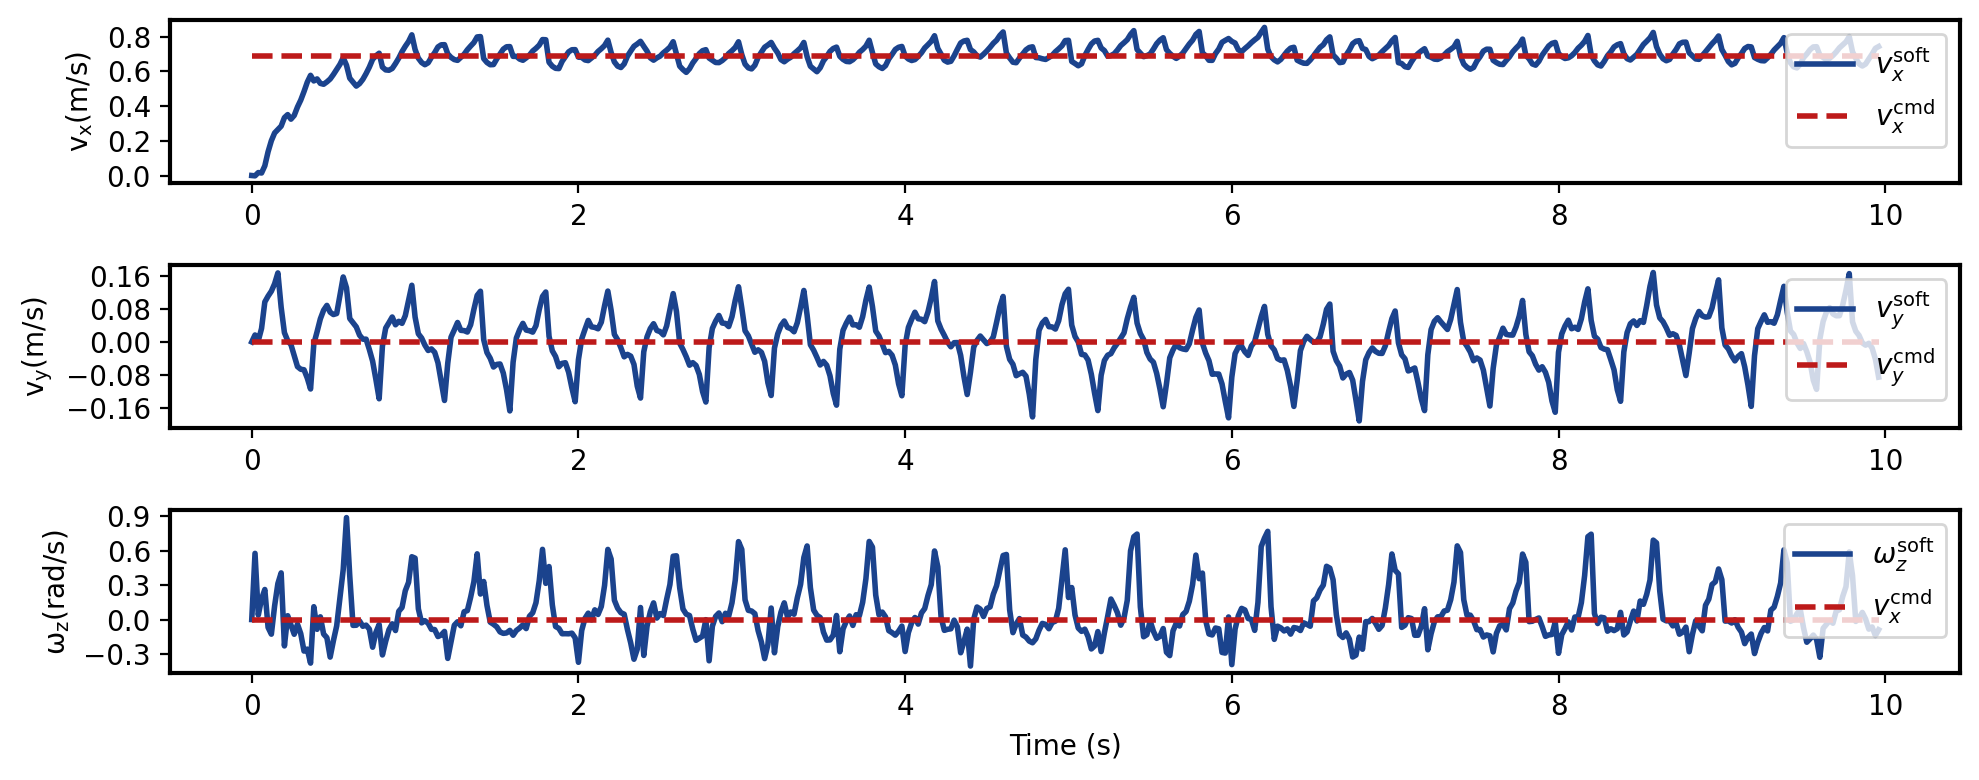

In [7]:
ENV_ID = np.random.randint(0, soft_contact_data["base_lin_vel"].shape[0])
t = 1/50 * np.arange(0, 1000)
t_range = slice(0, 499)
colors = ["#1B438D", "#3C7FFD", "#BD1A1A"]


fig, axs = plt.subplots(3, 1, figsize=(10, 4))

# vx
ax = axs[0]
ax.plot(t[t_range], soft_contact_data["base_lin_vel"][ENV_ID, t_range, 0], label=r"$v_x^\text{soft}$", color=colors[0])
# ax.plot(t[t_range], hard_contact_data["base_lin_vel"][ENV_ID, t_range, 0], label=r"$v_x^\text{hard}$", color=colors[1])
# axs.plot(t[t_range], hard_contact_data["velocity_commands"][ENV_ID, t_range, 0], '--', label=r"$v_x^\text{cmd}$", color="#126D1E")
ax.plot(t[t_range], soft_contact_data["velocity_commands"][ENV_ID, t_range, 0], '--', label=r"$v_x^\text{cmd}$", color=colors[2])
ax.legend(loc="upper right")
# ax.set_xlabel("Time (s)")
ax.set_ylabel(r"$\mathrm{v_x} (\mathrm{m/s})$")
ax.yaxis.set_major_locator(plt.MaxNLocator(5))


# vy
ax = axs[1]
ax.plot(t[t_range], soft_contact_data["base_lin_vel"][ENV_ID, t_range, 1], label=r"$v_y^\text{soft}$", color=colors[0])
ax.plot(t[t_range], soft_contact_data["velocity_commands"][ENV_ID, t_range, 1], '--', label=r"$v_y^\text{cmd}$", color=colors[2])
# axs.plot(t[t_range], hard_contact_data["base_lin_vel"][ENV_ID, t_range, 1], label=r"$v_y^\text{hard}$", color=colors[0])
# axs.plot(t[t_range], hard_contact_data["velocity_commands"][ENV_ID, t_range, 1], '--', label=r"$v_y^\text{cmd}$", color="#126D1E")
ax.legend(loc="upper right")
# ax.set_xlabel("Time (s)")
ax.set_ylabel(r"$\mathrm{v_y} (\mathrm{m/s})$")
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# wz
ax = axs[2]
ax.plot(t[t_range], soft_contact_data["base_ang_vel"][ENV_ID, t_range, 2], label=r"$\omega_z^\text{soft}$", color=colors[0])
ax.plot(t[t_range], soft_contact_data["velocity_commands"][ENV_ID, t_range, 2], '--', label=r"$v_x^\text{cmd}$", color=colors[2])
# ax.plot(t[t_range], hard_contact_data["base_ang_vel"][ENV_ID, t_range, 2], label=r"$\omega_z^\text{hard}$", color=colors[1])
# ax.plot(t[t_range], hard_contact_data["velocity_commands"][ENV_ID, t_range, 2], '--', label=r"$\omega_z^\text{cmd}$", color="#126D1E")
ax.legend(loc="upper right")
ax.set_xlabel("Time (s)")
ax.set_ylabel(r"$\mathrm{\omega_z} (\mathrm{rad/s})$")
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout()
plt.show()

### velocity tracking statistical result

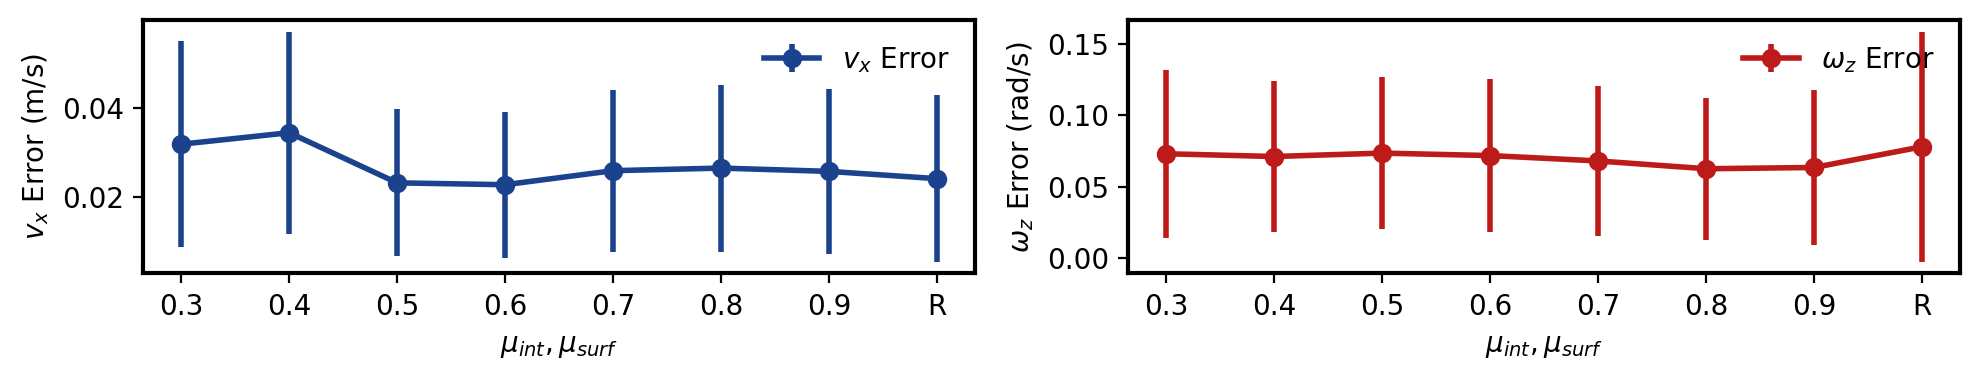

In [74]:
# error_file_path = data_dir / "g1_tracking_error.pkl"
error_file_path = data_dir / "t1_tracking_error.pkl"
with open(error_file_path, "rb") as f:
    tracking_error_data = pickle.load(f)

muints = sorted(tracking_error_data.keys())
vx_err_mean = [tracking_error_data[muint]["vx"][0] for muint in muints]
vx_err_std = [tracking_error_data[muint]["vx"][1] for muint in muints]
wz_err_mean = [tracking_error_data[muint]["wz"][0] for muint in muints]
wz_err_std = [tracking_error_data[muint]["wz"][1] for muint in muints]
mu_range = slice(None)
# mu_range = slice(1, None)

fig, ax = plt.subplots(1, 2, figsize=(10, 2))

# Plot
ax[0].errorbar(muints[mu_range], vx_err_mean[mu_range], yerr=vx_err_std[mu_range],
               fmt='-o', label=r"$v_x$ Error", color="#1B438D")
ax[1].errorbar(muints[mu_range], wz_err_mean[mu_range], yerr=wz_err_std[mu_range],
               fmt='-o', label=r"$\omega_z$ Error", color="#BD1A1A")

# === CREATE CUSTOM LABELS ===
# Convert your numeric keys to sorted floats
tick_positions = sorted(muints[mu_range])

# Build labels: last one becomes "R"
tick_labels = [f"{v:.1f}" for v in tick_positions]
tick_labels[-1] = "R"

# Apply to both subplots
for a in ax:
    a.set_xticks(tick_positions)
    a.set_xticklabels(tick_labels)
    a.set_xlabel("$\mu_{int}, \mu_{surf}$")
ax[0].set_ylabel(r"$v_x$ Error $\mathrm{(m/s)}$")
ax[1].set_ylabel(r"$\omega_z$ Error $\mathrm{(rad/s)}$")

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.tight_layout()
# plt.savefig("t1_tracking_perf.pdf")
plt.show()


#### contact force

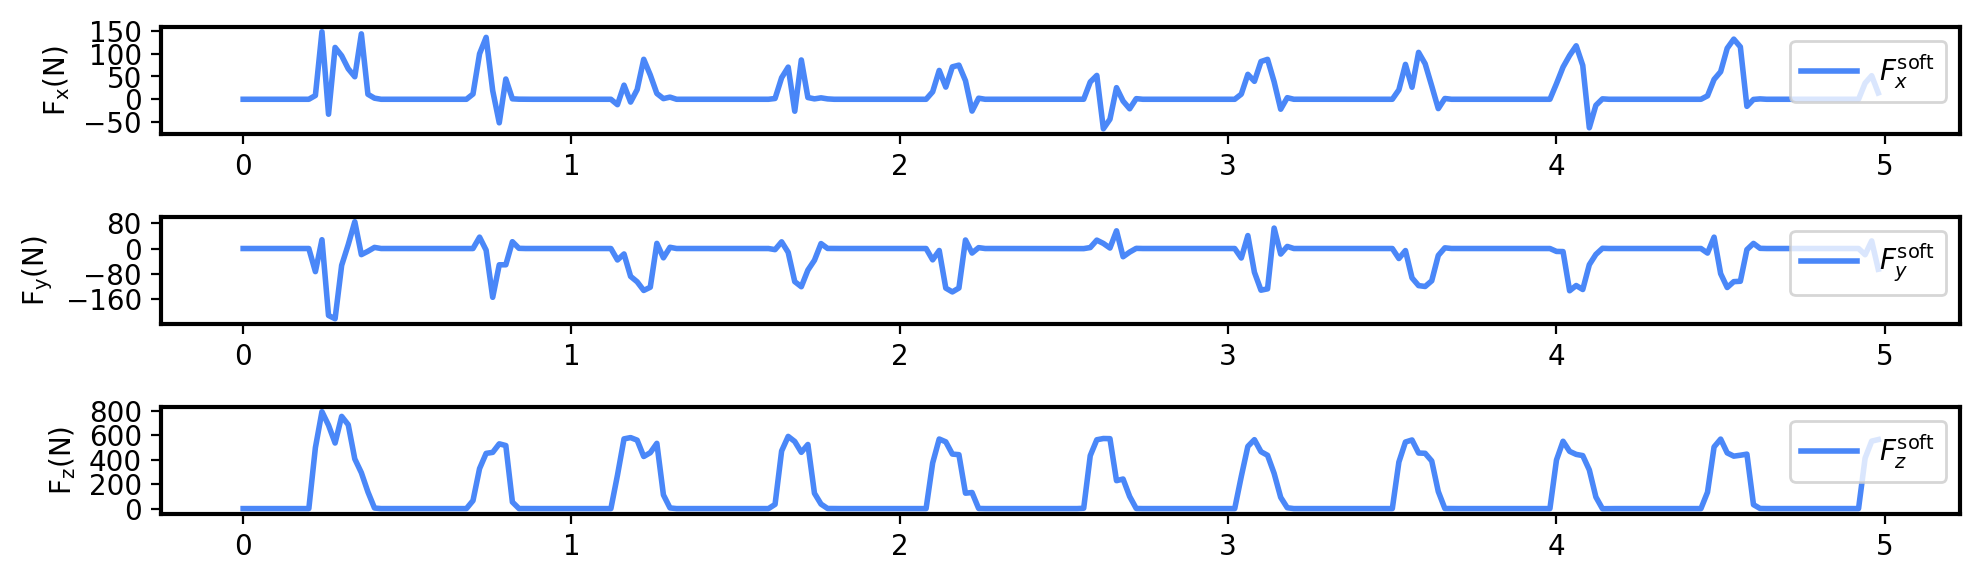

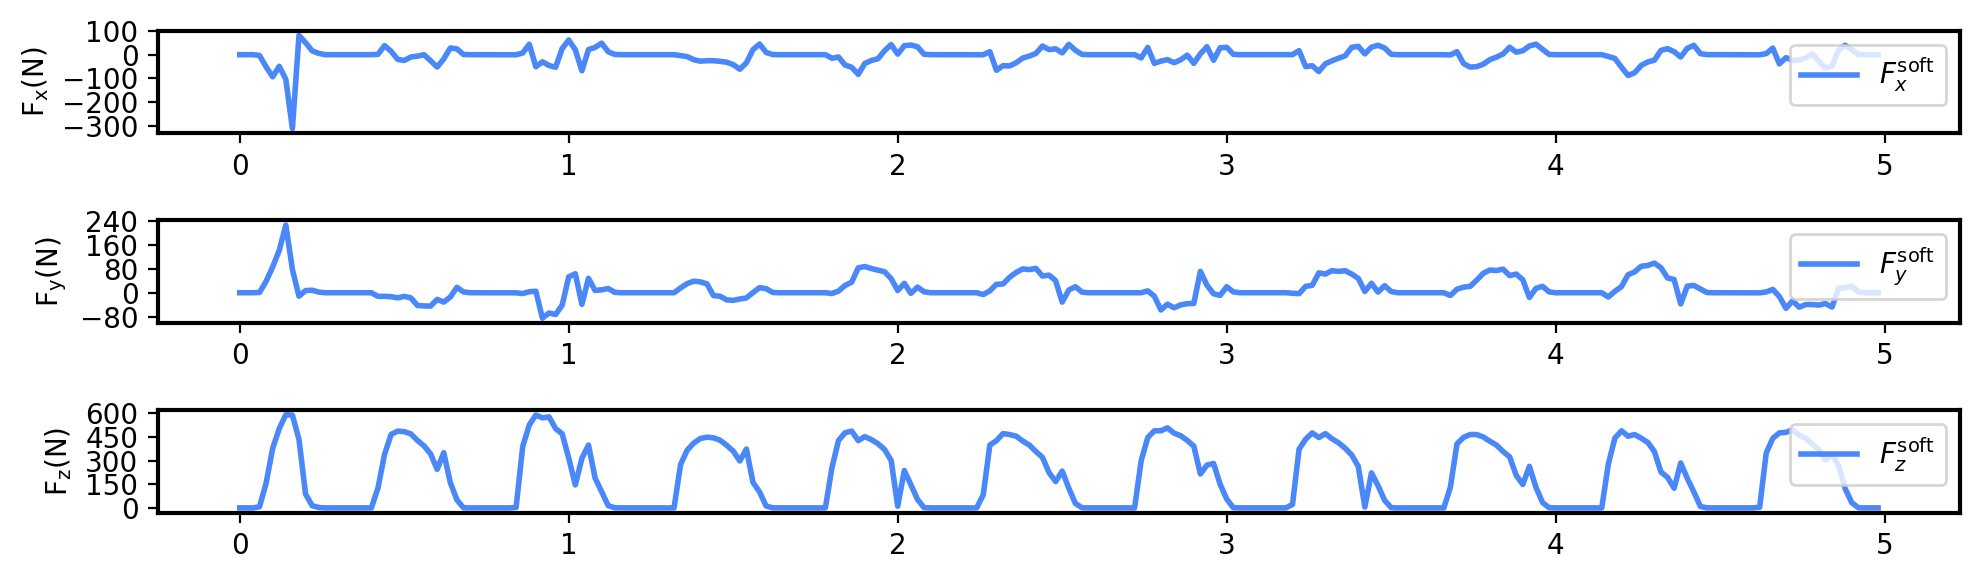

In [303]:
ENV_ID = 0
t = 1/50 * np.arange(0, 1000)
# t_range = slice(None)
t_range = slice(0, 250)

# plot colors
colors = ["#1B438D", "#4A87F8"]

# left force
fig, axs = plt.subplots(3, 1, figsize=(10, 3))
axs[0].plot(t[t_range], soft_contact_data["left_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{soft}$", color=colors[1])
# axs[0].plot(t[t_range], hard_contact_data["left_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{hard}$", color=colors[0])
axs[0].legend(loc="upper right")
axs[0].set_ylabel(r"$\mathrm{F_x} (\mathrm{N})$")
axs[0].yaxis.set_major_locator(plt.MaxNLocator(5))
# axs[0].set_ylim([-100, 250])

axs[1].plot(t[t_range], soft_contact_data["left_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{soft}$", color=colors[1])
# axs[1].plot(t[t_range], hard_contact_data["left_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{hard}$", color=colors[0])
axs[1].legend(loc="upper right")
axs[1].set_ylabel(r"$\mathrm{F_y} (\mathrm{N})$")
axs[1].yaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(t[t_range], soft_contact_data["left_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{soft}$", color=colors[1])
# axs[2].plot(t[t_range], hard_contact_data["left_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{hard}$", color=colors[0])
axs[2].legend(loc="upper right")
axs[2].set_ylabel(r"$\mathrm{F_z} (\mathrm{N})$")
axs[2].yaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout()
# plt.savefig("left_force.pdf")
plt.show()

# right force
fig, axs = plt.subplots(3, 1, figsize=(10, 3))
axs[0].plot(t[t_range], soft_contact_data["right_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{soft}$", color=colors[1])
# axs[0].plot(t[t_range], hard_contact_data["right_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{hard}$", color=colors[0])
axs[0].legend(loc="upper right")
axs[0].set_ylabel(r"$\mathrm{F_x} (\mathrm{N})$")
axs[0].yaxis.set_major_locator(plt.MaxNLocator(5))
# axs[0].set_ylim([-100, 250])

axs[1].plot(t[t_range], soft_contact_data["right_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{soft}$", color=colors[1])
# axs[1].plot(t[t_range], hard_contact_data["right_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{hard}$", color=colors[0])
axs[1].legend(loc="upper right")
axs[1].set_ylabel(r"$\mathrm{F_y} (\mathrm{N})$")
axs[1].yaxis.set_major_locator(plt.MaxNLocator(5))

axs[2].plot(t[t_range], soft_contact_data["right_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{soft}$", color=colors[1])
# axs[2].plot(t[t_range], hard_contact_data["right_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{hard}$", color=colors[0])
axs[2].legend(loc="upper right")
axs[2].set_ylabel(r"$\mathrm{F_z} (\mathrm{N})$")
axs[2].yaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout()
plt.savefig("right_force.pdf")
plt.show()

#### foot position

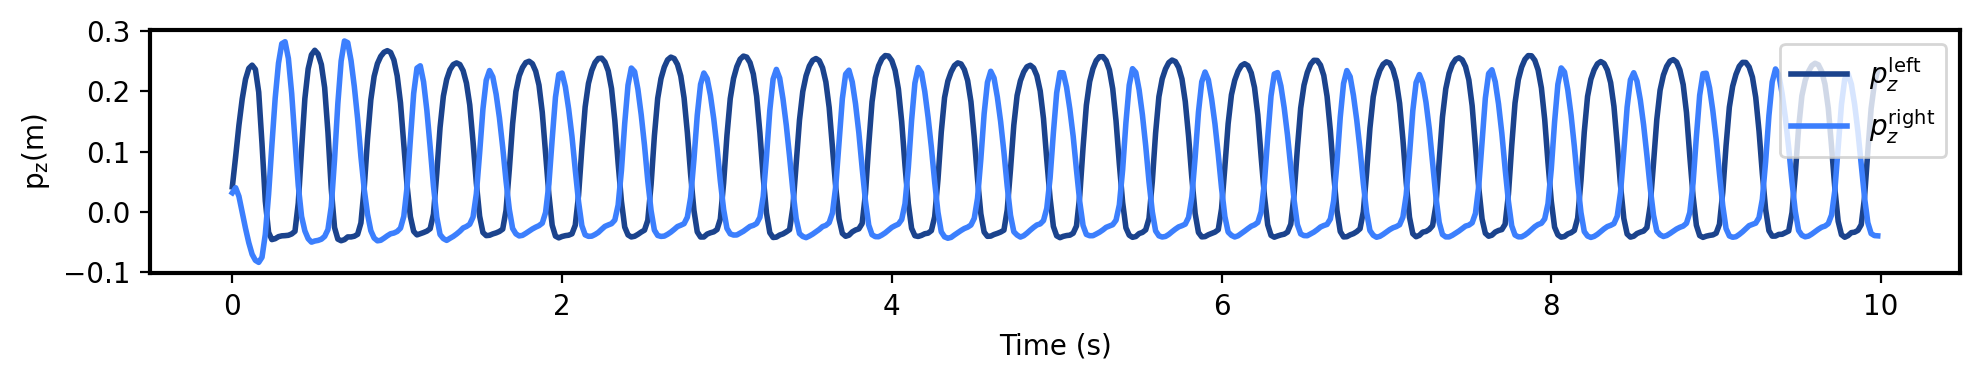

In [307]:
ENV_ID = np.random.randint(0, soft_contact_data["base_lin_vel"].shape[0])
t = 1/50 * np.arange(0, 1000)
t_range = slice(0, 500)
colors = ["#1B438D", "#3C7FFD"]


fig, axs = plt.subplots(1, 1, figsize=(10, 2))

# vx
axs.plot(t[t_range], soft_contact_data["left_foot_pos"][ENV_ID, t_range, 2], label=r"$p_z^\text{left}$", color=colors[0])
axs.plot(t[t_range], soft_contact_data["right_foot_pos"][ENV_ID, t_range, 2], label=r"$p_z^\text{right}$", color=colors[1])
axs.legend(loc="upper right")
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{p_z} (\mathrm{m})$")

axs.yaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout()
# plt.savefig("foot_pos.pdf")
plt.show()